# Obtención y preparación de datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
df = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
df['Target'] = cancer_dataset.target[df.index]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
x = df.drop("Target", axis = 1)
y = df.Target

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=100)

# Árbol de clasificación

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [6]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = "Tree.ps")

### ¿Cómo transformar el código en una imagén?
Alternativa 1: https://edotor.net/
<br>Alternativa 2: http://www.webgraphviz.com/
<br>Alternativa 3: https://stamm-wilbrandt.de/GraphvizFiddle/#

### Tu árbol debe ser muy parecido al que tienes aquí en la libreta.

<center><img src="img/ClasfTree1.png" width = "100%"></center>

In [9]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
feature_labels = []
for col in x.columns:
    feature_labels.append(col)

print(feature_labels)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
class_labels = ['malignant', 'benign']

In [12]:
export_graphviz(clf, out_file = "TreeWithInfo.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

### Tu árbol debe ser muy parecido al que tienes aquí en la libreta.

<center><img src="img/ClasfTree2.png" width = "100%"></center>

### Reporte de la clasificación

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       255

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        69
           1       0.93      0.97      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### Matriz de confusión

In [14]:
from sklearn.metrics import confusion_matrix

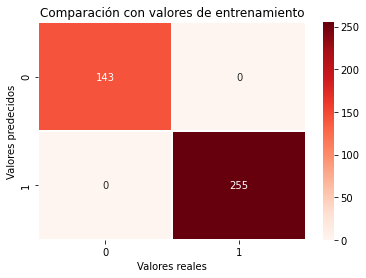

In [15]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

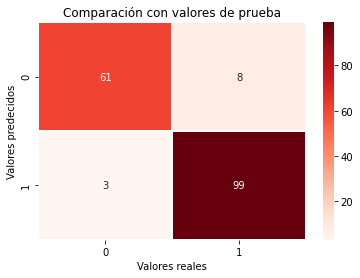

In [16]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

### Selección de características

In [17]:
from sklearn.feature_selection import RFE
selector = RFE(clf, 8, step = 1)
selector = selector.fit(x_train, y_train.ravel())
print(selector.support_)
print(selector.ranking_)

[False  True False  True False False False False False False  True False
 False False False False False False  True False False  True False  True
 False False  True  True False False]
[23  1 16  1 10  9  5  8  7  6  1 13 17 18 21 22 15 14  1  4  2  1  3  1
 11 12  1  1 19 20]


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
n = int(selector.support_.size)

for i in range(n):
    if selector.support_[i] == True:
        print(cancer_dataset.feature_names[i])

mean texture
mean area
radius error
symmetry error
worst texture
worst area
worst concavity
worst concave points


# Volvamos a hacer el árbol pero con una copia reducida de los datos

In [19]:
df_reduced = df.drop("Target", axis = 1)
df_reduced = df_reduced.loc[:, selector.support_]
df_reduced.head()

,mean texture,mean area,radius error,symmetry error,worst texture,worst area,worst concavity,worst concave points
0,10.38,1001.0,1.0950,0.03003,17.33,2019.0,0.7119,0.2654
1,17.77,1326.0,0.5435,0.01389,23.41,1956.0,0.2416,0.1860
2,21.25,1203.0,0.7456,0.02250,25.53,1709.0,0.4504,0.2430
3,20.38,386.1,0.4956,0.05963,26.50,567.7,0.6869,0.2575
4,14.34,1297.0,0.7572,0.01756,16.67,1575.0,0.4000,0.1625


In [20]:
x = df_reduced
y = df.Target

Index(['mean texture', 'mean area', 'radius error', 'symmetry error',
       'worst texture', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       255

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        69
           1       0.94      0.98      0.96       102

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

-----------------------------------------------------


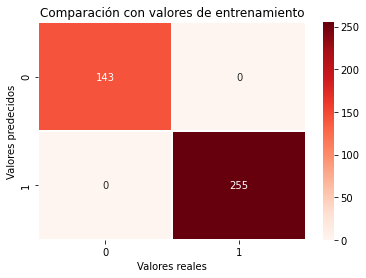

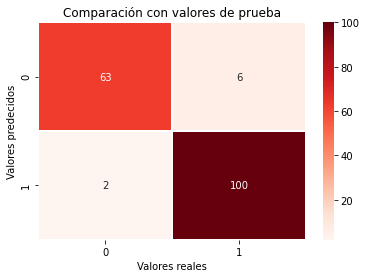

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=100)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

print(x.columns)
class_labels = ['malignant', 'benign']
feature_labels = []
for col in x.columns:
    feature_labels.append(col)

export_graphviz(clf, out_file = "ReducedTreeWithInfo.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

print("-----------------------------------------------------")
print(classification_report(y_train, y_train_predict))
print("-----------------------------------------------------")
print(classification_report(y_test, y_test_predict))
print("-----------------------------------------------------")

cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

### Tu árbol debe ser muy parecido al que tienes aquí en la libreta.

<center><img src="img/ClasfTree3.png" width = "100%"></center>

# Ahora analicemos un ejemplo donde existen multíples clases.

# Obtención y preparación de datos

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
dataset_description = iris.DESCR
print(dataset_description)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
df2 = pd.DataFrame(iris.data, columns = iris.feature_names)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df2['Target']=iris.target[df2.index]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df2['Target'].unique()

array([0, 1, 2])

In [26]:
x = df2.drop("Target", axis = 1)
y = df2.Target

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        32

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

-----------

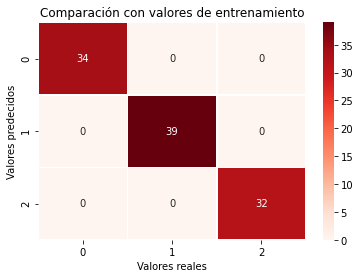

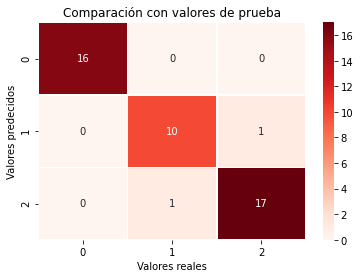

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=100)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)

print(x.columns)
class_labels = ['Setosa', 'Versicolour', 'Virginica']
feature_labels = []
for col in x.columns:
    feature_labels.append(col)

export_graphviz(clf, out_file = "IrisTreeWithInfo.ps", 
                feature_names = feature_labels, 
                class_names = class_labels,
                filled = True,
                rounded = True
               )

print("-----------------------------------------------------")
print(classification_report(y_train, y_train_predict))
print("-----------------------------------------------------")
print(classification_report(y_test, y_test_predict))
print("-----------------------------------------------------")

cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

### Tu árbol debe ser muy parecido al que tienes aquí en la libreta.

<center><img src="img/ClasfTree4.png" width = "80%"></center>